In [20]:
# data
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [14]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [130]:
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('Hospital_log.xes')

parsing log, completed traces ::   0%|          | 0/1143 [00:00<?, ?it/s]

In [131]:
log

[{'attributes': {'End date': datetime.datetime(2006, 1, 4, 23, 45, 36, tzinfo=datetime.timezone(datetime.timedelta(0, 3600))), 'Age': 33, 'Treatment code:2': 23, 'Treatment code:1': 13, 'Diagnosis code:2': 106, 'Specialism code': 7, 'Diagnosis code:1': 106, 'Treatment code': 103, 'Diagnosis:2': 'Gynaecologische tumoren', 'Diagnosis:1': 'Gynaecologische tumoren', 'Diagnosis': 'maligniteit cervix', 'Diagnosis Treatment Combination ID': 181229, 'Start date': datetime.datetime(2005, 1, 5, 0, 14, 24, tzinfo=datetime.timezone(datetime.timedelta(0, 3600))), 'Diagnosis Treatment Combination ID:2': 376908, 'Diagnosis code': 'M13', 'Diagnosis Treatment Combination ID:1': 376907, 'concept:name': '00000000', 'Start date:1': datetime.datetime(2005, 1, 3, 0, 14, 24, tzinfo=datetime.timezone(datetime.timedelta(0, 3600))), 'End date:1': datetime.datetime(2005, 1, 29, 23, 45, 36, tzinfo=datetime.timezone(datetime.timedelta(0, 3600))), 'End date:2': datetime.datetime(2005, 1, 29, 23, 45, 36, tzinfo=date

In [11]:
process_model = pm4py.discover_bpmn_inductive(log)


In [12]:
pm4py.view_bpmn(process_model)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.730542 to fit


In [132]:
df = pm4py.convert_to_dataframe(log)
df.head()

org:group  Number of executions  Specialism code  \
0                     Radiotherapy                     1               61   
1                     Radiotherapy                     1               61   
2                     Nursing ward                     1                7   
3  Obstetrics & Gynaecology clinic                     1                7   
4                     Nursing ward                     1                7   

                               concept:name Producer code    Section  \
0                   1e consult poliklinisch          SRTH  Section 5   
1  administratief tarief       - eerste pol          SRTH  Section 5   
2   verlosk.-gynaec. korte kaart kosten-out          SGEH  Section 2   
3           echografie  - genitalia interna          SGEC  Section 2   
4                   1e consult poliklinisch          SGEH  Section 2   

  Activity code             time:timestamp lifecycle:transition  \
0        410100  2005-01-03 00:00:00+01:00             complete   
1        419100  2005-01-03 00:00:00+01:00             complete   
2         10107  2005-01-05 00:00:00+01:00             complete   
3       339486E  2005-01-05 00:00:00+01:00             complete   
4        410100  2005-01-05 00:00:00+01:00             complete   

              case:End date  ...  case:Treatment code:14  \
0 2006-01-04 23:45:36+01:00  ...                     NaN   
1 2006-01-04 23:45:36+01:00  ...                     NaN   
2 2006-01-04 23:45:36+01:00  ...                     NaN   
3 2006-01-04 23:45:36+01:00  ...                     NaN   
4 2006-01-04 23:45:36+01:00  ...                     NaN   

   case:Treatment code:15  case:Diagnosis:15 case:Diagnosis:14  \
0                     NaN                NaN               NaN   
1                     NaN                NaN               NaN   
2                     NaN                NaN               NaN   
3                     NaN                NaN               NaN   
4                     NaN                NaN               NaN   

   case:Diagnosis:11 case:Diagnosis:13  case:Diagnosis:12  \
0                NaN               NaN                NaN   
1                NaN               NaN                NaN   
2                NaN               NaN                NaN   
3                NaN               NaN                NaN   
4                NaN               NaN                NaN   

  case:Diagnosis code:14 case:Diagnosis code:13 case:Diagnosis code:15  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 128 columns]

In [133]:
df.columns

Index(['org:group', 'Number of executions', 'Specialism code', 'concept:name',
       'Producer code', 'Section', 'Activity code', 'time:timestamp',
       'lifecycle:transition', 'case:End date',
       ...
       'case:Treatment code:14', 'case:Treatment code:15', 'case:Diagnosis:15',
       'case:Diagnosis:14', 'case:Diagnosis:11', 'case:Diagnosis:13',
       'case:Diagnosis:12', 'case:Diagnosis code:14', 'case:Diagnosis code:13',
       'case:Diagnosis code:15'],
      dtype='object', length=128)

In [134]:
Radiotherapy_df=df[df['org:group']=='Radiotherapy']
Radiotherapy_df

org:group  Number of executions  Specialism code  \
0       Radiotherapy                     1               61   
1       Radiotherapy                     1               61   
6       Radiotherapy                     1               61   
7       Radiotherapy                     1               61   
8       Radiotherapy                     1               61   
...              ...                   ...              ...   
149715  Radiotherapy                     1               61   
149935  Radiotherapy                     1               61   
149936  Radiotherapy                     1               61   
150117  Radiotherapy                     1               61   
150118  Radiotherapy                     1               61   

                                    concept:name Producer code    Section  \
0                        1e consult poliklinisch          SRTH  Section 5   
1       administratief tarief       - eerste pol          SRTH  Section 5   
6       simulator - gebruik voor aanvang megavol          RATH  Section 5   
7           behandeltijd - eenheid t3 - megavolt          RATH  Section 5   
8       teletherapie - megavolt fotonen bestrali          RATH  Section 5   
...                                          ...           ...        ...   
149715    interc.consult klinisch  radiotherapie          SRTH  Section 5   
149935                    1e consult      bezoek          SRTH  Section 5   
149936    interc.consult klinisch  radiotherapie          SRTH  Section 5   
150117                    1e consult      bezoek          SRTH  Section 5   
150118    interc.consult klinisch  radiotherapie          SRTH  Section 5   

       Activity code             time:timestamp lifecycle:transition  \
0             410100  2005-01-03 00:00:00+01:00             complete   
1             419100  2005-01-03 00:00:00+01:00             complete   
6             390520  2005-01-24 00:00:00+01:00             complete   
7             390003  2005-01-31 00:00:00+01:00             complete   
8             390550  2005-01-31 00:00:00+01:00             complete   
...              ...                        ...                  ...   
149715        413461  2008-02-29 00:00:00+01:00             complete   
149935        410500  2008-03-06 00:00:00+01:00             complete   
149936        413461  2008-03-06 00:00:00+01:00             complete   
150117        410500  2008-03-18 00:00:00+01:00             complete   
150118        413461  2008-03-18 00:00:00+01:00             complete   

                   case:End date  ...  case:Treatment code:14  \
0      2006-01-04 23:45:36+01:00  ...                     NaN   
1      2006-01-04 23:45:36+01:00  ...                     NaN   
6      2006-01-04 23:45:36+01:00  ...                     NaN   
7      2006-01-04 23:45:36+01:00  ...                     NaN   
8      2006-01-04 23:45:36+01:00  ...                     NaN   
...                          ...  ...                     ...   
149715                       NaT  ...                     NaN   
149935                       NaT  ...                     NaN   
149936                       NaT  ...                     NaN   
150117                       NaT  ...                     NaN   
150118                       NaT  ...                     NaN   

        case:Treatment code:15  case:Diagnosis:15 case:Diagnosis:14  \
0                          NaN                NaN               NaN   
1                          NaN                NaN               NaN   
6                          NaN                NaN               NaN   
7                          NaN                NaN               NaN   
8                          NaN                NaN               NaN   
...                        ...                ...               ...   
149715                     NaN                NaN               NaN   
149935                     NaN                NaN               NaN   
149936                     NaN              

In [135]:
missing_values_table(Radiotherapy_df)

Your selected dataframe has 128 columns.
There are 118 columns that have missing values.


Missing Values  % of Total Values
case:Age:5                                           2233              100.0
case:Diagnosis code:15                               2183               97.8
case:Specialism code:14                              2183               97.8
case:Start date:14                                   2183               97.8
case:Diagnosis code:11                               2183               97.8
...                                                   ...                ...
case:Diagnosis Treatment Combination ID:2             220                9.9
case:Start date:2                                     220                9.9
case:Specialism code:1                                220                9.9
case:Start date:1                                     220                9.9
case:Diagnosis Treatment Combination ID:1             220                9.9

[118 rows x 2 columns]

In [136]:
Radiotherapy_df = dataframe_utils.convert_timestamp_columns_in_df(Radiotherapy_df)
Radiotherapy_df = Radiotherapy_df.sort_values('time:timestamp')

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], utc=True)


In [137]:
log_Radiotherapy = log_converter.apply(Radiotherapy_df)

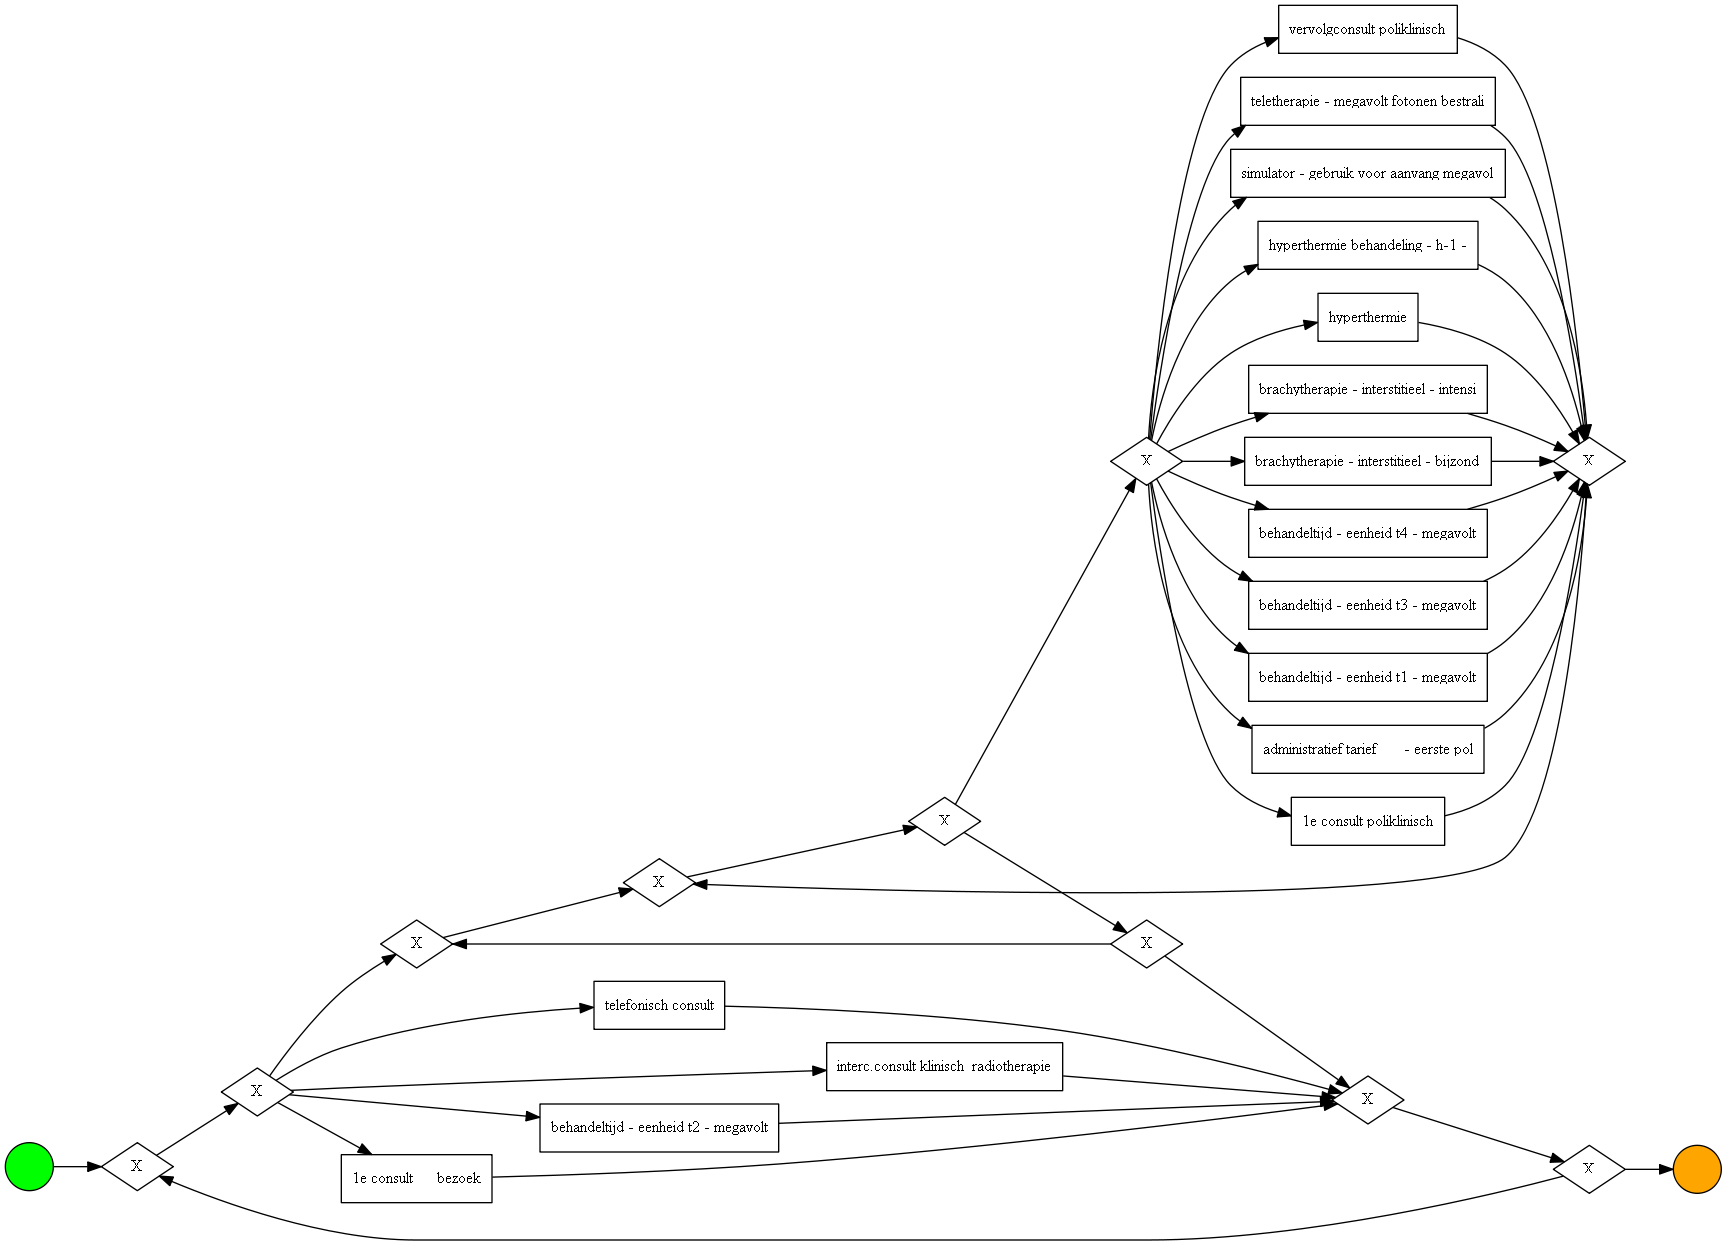

In [144]:
process_model_log_Radiotherapy = pm4py.discover_bpmn_inductive(log_Radiotherapy)
pm4py.view_bpmn(process_model_log_Radiotherapy)

In [138]:
# heuristics miner
heu_net = heuristics_miner.apply_heu(log_Radiotherapy)

In [140]:
# viz
gviz = hn_visualizer.apply(heu_net)

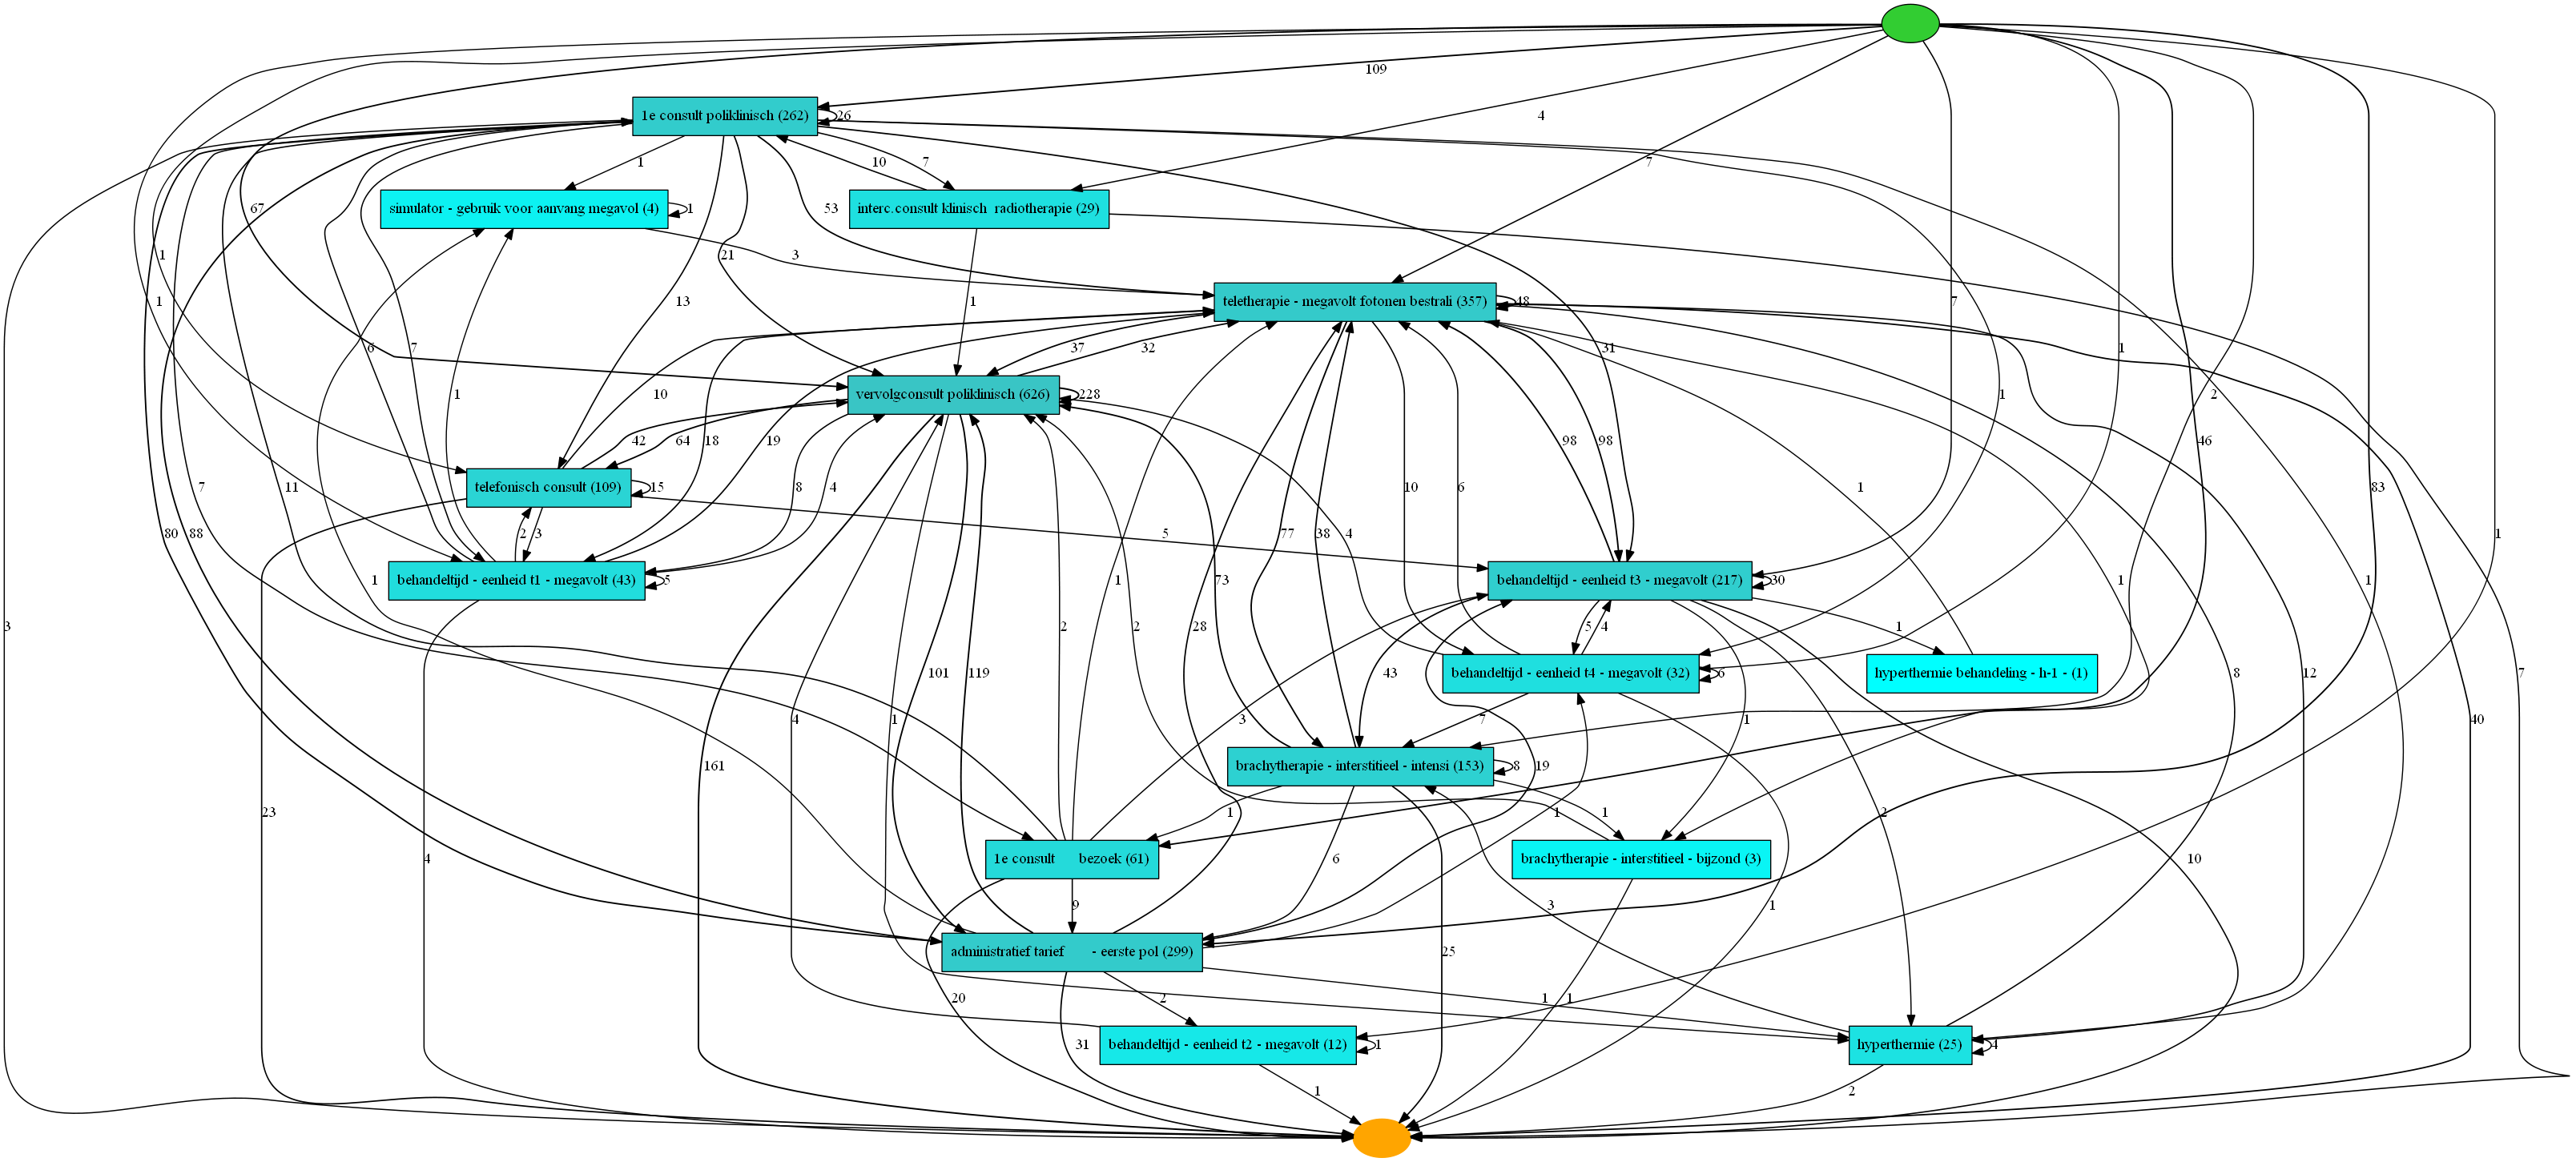

In [143]:
hn_visualizer.view(gviz)

In [96]:
missing_values_table(df)

Your selected dataframe has 129 columns.
There are 120 columns that have missing values.


Missing Values  % of Total Values
case:Age:5                                         149939               99.8
case:Diagnosis code:15                             149500               99.5
case:Specialism code:15                            149500               99.5
case:Start date:14                                 149500               99.5
case:Diagnosis code:11                             149500               99.5
...                                                   ...                ...
case:Diagnosis:1                                    44864               29.9
case:Specialism code:1                              44864               29.9
case:Diagnosis Treatment Combination ID:2           44864               29.9
Section                                                16                0.0
org:group                                              16                0.0

[120 rows x 2 columns]

In [19]:
print(df.columns)

Index(['org:group', 'Number of executions', 'Specialism code', 'concept:name',
       'Producer code', 'Section', 'Activity code', 'time:timestamp',
       'lifecycle:transition', 'case:End date',
       ...
       'case:Treatment code:14', 'case:Treatment code:15', 'case:Diagnosis:15',
       'case:Diagnosis:14', 'case:Diagnosis:11', 'case:Diagnosis:13',
       'case:Diagnosis:12', 'case:Diagnosis code:14', 'case:Diagnosis code:13',
       'case:Diagnosis code:15'],
      dtype='object', length=128)


In [149]:
#drop not usefull columns
# ids, booleans, objects and etc no data 
DataCleaned=df.copy()
DataCleaned.drop(columns=['case:Treatment code:14', 'case:Treatment code:15', 'case:Diagnosis:15',
       'case:Diagnosis:14', 'case:Diagnosis:11', 'case:Diagnosis:13',
       'case:Diagnosis:12', 'case:Diagnosis code:14', 'case:Diagnosis code:13',
       'case:Diagnosis code:15','case:Age:5', 'case:Diagnosis code:12', 'case:End date:11',
       'case:Start date:12', 'case:Start date:11', 'case:End date:12',
       'case:End date:13', 'case:End date:14', 'case:End date:15',
       'case:Specialism code:15','case:Treatment code:11', 'case:Specialism code:11',
       'case:Specialism code:14', 'case:Specialism code:13',
       'case:Specialism code:12', 'case:Start date:13',
       'case:Diagnosis code:11', 'case:Start date:15', 'case:Start date:14',
       'case:Diagnosis Treatment Combination ID:11',
       'case:Diagnosis Treatment Combination ID:13',
       'case:Diagnosis Treatment Combination ID:12',
       'case:Diagnosis Treatment Combination ID:15',
       'case:Diagnosis Treatment Combination ID:14', 'case:Treatment code:12',
       'case:Treatment code:13', 'case:End date:9', 'case:End date:10',
       'case:Diagnosis:10', 'case:Treatment code:10','case:Specialism code:10', 'case:Start date:10',
       'case:Diagnosis code:10', 'case:Diagnosis Treatment Combination ID:10',
       'case:Diagnosis Treatment Combination ID:9', 'case:Start date:9',
       'case:Diagnosis:9', 'case:Specialism code:9', 'case:Treatment code:9',
       'case:Diagnosis code:9', 'case:End date:8', 'case:End date:7',
       'case:Diagnosis Treatment Combination ID:8', 'case:Start date:8',
       'case:Diagnosis:8', 'case:Treatment code:8', 'case:Diagnosis code:8',
       'case:Specialism code:8', 'case:Start date:7',
       'case:Specialism code:7'],axis=1,inplace=True)


In [150]:
substring = "case:Age"
strings_with_substring = [string for string in df.columns if substring in string]
strings_with_substring

['case:Age',
 'case:Age:1',
 'case:Age:2',
 'case:Age:3',
 'case:Age:4',
 'case:Age:5']

In [83]:
df['Age'] = df[['case:Age',
 'case:Age:1',
 'case:Age:2',
 'case:Age:3',
 'case:Age:4',
 'case:Age:5']].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [94]:
df['case:Diagnosis:14'].unique()

array([nan, 'Gynaecologische tumoren'], dtype=object)

In [151]:
df['case:Age:4'].unique()

array([nan, 33., 49., 61., 43., 57., 65., 67., 42., 40., 38., 78., 62.,
       72., 60., 45., 69., 74., 73., 59., 35., 63., 53., 71., 30., 37.,
       75., 70., 82., 28., 54., 76.])

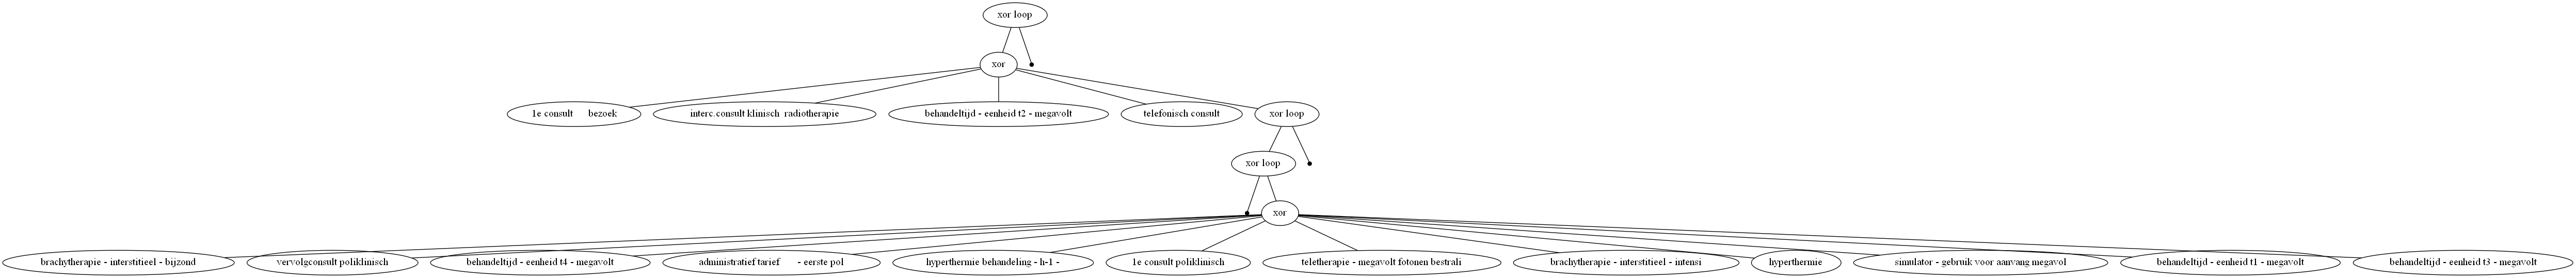

In [146]:
# create the process tree
tree = inductive_miner.apply_tree(log)
# viz
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  


replaying log with TBR, completed variants ::   0%|          | 0/232 [00:00<?, ?it/s]

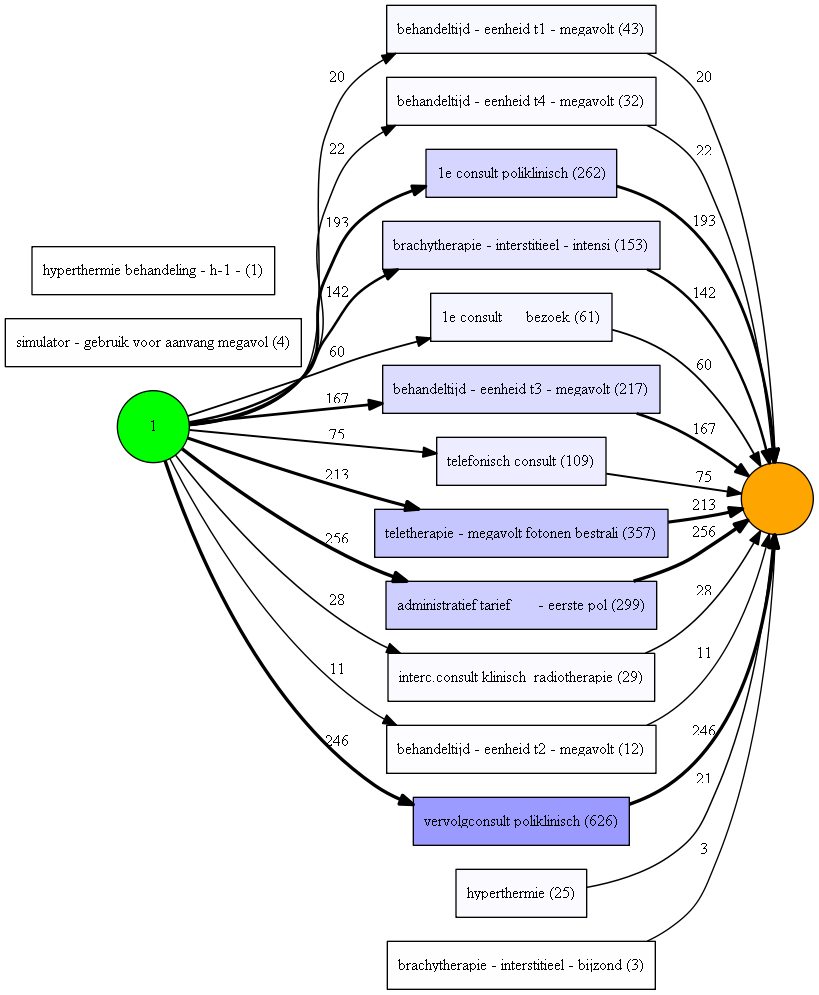

In [148]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log_Radiotherapy)
# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log_Radiotherapy)

# save the Petri net pn_visualizer.save(gviz, "alpha_miner_petri_net.png")
pn_visualizer.view(gviz)

In [123]:
# xes 
#log = xes_importer.apply('running-example.xes')

# csv
df = pd.read_csv('running-example.csv', encoding='Latin-1')
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values('time:timestamp')

log = log_converter.apply(df)

In [124]:
log

[{'attributes': {'concept:name': 1, 'creator': 'Fluxicon Nitro'}, 'events': [{'Activity': 'register request', 'Costs': 50, 'Resource': 'Pete', 'concept:name': 'register request', 'org:resource': 'Pete', 'time:timestamp': Timestamp('2010-12-30 10:02:00+0000', tz='UTC')}, '..', {'Activity': 'reject request', 'Costs': 200, 'Resource': 'Pete', 'concept:name': 'reject request', 'org:resource': 'Pete', 'time:timestamp': Timestamp('2011-01-07 13:24:00+0000', tz='UTC')}]}, '....', {'attributes': {'concept:name': 6, 'creator': 'Fluxicon Nitro'}, 'events': [{'Activity': 'register request', 'Costs': 50, 'Resource': 'Mike', 'concept:name': 'register request', 'org:resource': 'Mike', 'time:timestamp': Timestamp('2011-01-06 14:02:00+0000', tz='UTC')}, '..', {'Activity': 'pay compensation', 'Costs': 200, 'Resource': 'Mike', 'concept:name': 'pay compensation', 'org:resource': 'Mike', 'time:timestamp': Timestamp('2011-01-16 10:47:00+0000', tz='UTC')}]}]

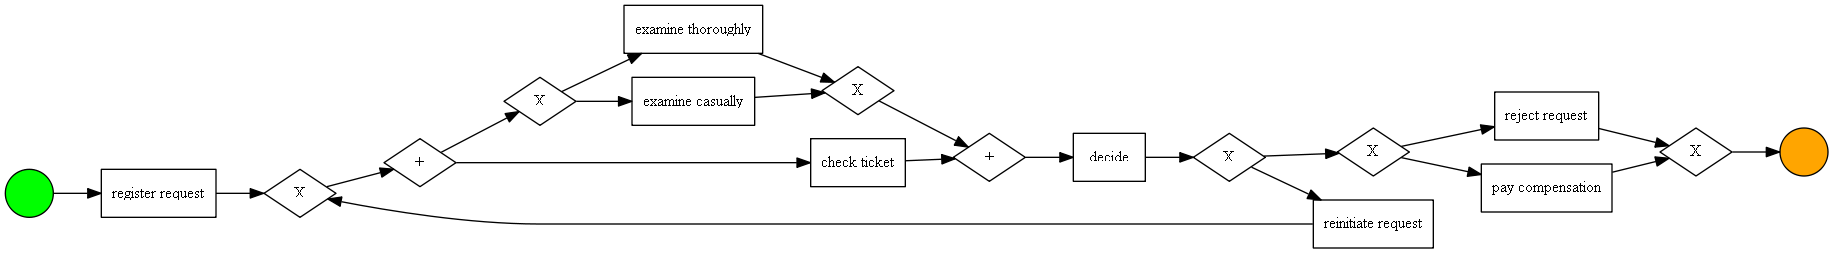

In [125]:
process_model1 = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(process_model1)

In [5]:
df

Activity  Costs Resource  case:concept:name    case:creator  \
14    register request     50     Pete                  1  Fluxicon Nitro   
9     register request     50     Mike                  2  Fluxicon Nitro   
10        check ticket    100     Mike                  2  Fluxicon Nitro   
11    examine casually    400     Sean                  2  Fluxicon Nitro   
0     register request     50     Pete                  3  Fluxicon Nitro   
1     examine casually    400     Mike                  3  Fluxicon Nitro   
2         check ticket    100    Ellen                  3  Fluxicon Nitro   
15  examine thoroughly    400      Sue                  1  Fluxicon Nitro   
12              decide    200     Sara                  2  Fluxicon Nitro   
16        check ticket    100     Mike                  1  Fluxicon Nitro   
24    register request     50    Ellen                  5  Fluxicon Nitro   
3               decide    200     Sara                  3  Fluxicon Nitro   
17              decide    200     Sara                  1  Fluxicon Nitro   
4   reinitiate request    200     Sara                  3  Fluxicon Nitro   
5   examine thoroughly    400     Sean                  3  Fluxicon Nitro   
37    register request     50     Pete                  4  Fluxicon Nitro   
19    register request     50     Mike                  6  Fluxicon Nitro   
20    examine casually    400    Ellen                  6  Fluxicon Nitro   
25    examine casually    400     Mike                  5  Fluxicon Nitro   
38        check ticket    100     Mike                  4  Fluxicon Nitro   
18      reject request    200     Pete                  1  Fluxicon Nitro   
21        check ticket    100     Mike                  6  Fluxicon Nitro   
22              decide    200     Sara                  6  Fluxicon Nitro   
26        check ticket    100     Pete                  5  Fluxicon Nitro   
6         check ticket    100     Pete                  3  Fluxicon Nitro   
13    pay compensation    200    Ellen                  2  Fluxicon Nitro   
39  examine thoroughly    400     Sean                  4  Fluxicon Nitro   
7               decide    200     Sara                  3  Fluxicon Nitro   
40              decide    200     Sara                  4  Fluxicon Nitro   
27              decide    200     Sara                  5  Fluxicon Nitro   
28  reinitiate request    200     Sara                  5  Fluxicon Nitro   
41      reject request    200    Ellen                  4  Fluxicon Nitro   
29        check ticket    100    Ellen                  5  Fluxicon Nitro   
8     pay compensation    200    Ellen                  3  Fluxicon Nitro   
23    pay compensation    200     Mike                  6  Fluxicon Nitro   
30    examine casually    400     Mike                  5  Fluxicon Nitro   
31              decide    200     Sara                  5  Fluxicon Nitro   
32  reinitiate request    200     Sara                  5  Fluxicon Nitro   
33    examine casually    400      Sue                  5  Fluxicon Nitro   
34        check ticket    100     Pete                  5  Fluxicon Nitro   
35              decide    200     Sara                  5  Fluxicon Nitro   
36      reject request    200     Mike                  5  Fluxicon Nitro   

          concept:name org:resource            time:timestamp  
14    register request         Pete 2010-12-30 10:02:00+00:00  
9     register request         Mike 2010-12-30 10:32:00+00:00  
10        check ticket         Mike 2010-12-30 11:12:00+00:00  
11    examine casually         Sean 2010-12-30 13:16:00+00:00  
0     register request         Pete 2010-12-30 13:32:00+00:00  
1     examine casually         Mike 2010-12-30 14:06:00+00:00  
2         check ticket        Ellen 2010-12-30 15:34:00+00:00  
15  examine thoroughly          Sue 2010-12-31 09:06:00+00:00  
12              decide         Sara 2011-01-05 10:22:00+00:00  
16        check ticket         Mike 2011-01-05 14:12:00+00:00 

# Alpha Miner
Alpha Miner is one of the best-known process discovery algorithms. It scans the traces (sequences in the event log) for ordering relations and builds the footprint matrix. Then, it converts the matrix into a Petri net (a type of graph).  

Running Alpha Miner results in the following:

a Petri net model in which all the transitions are visible, unique, and correspond to the classified events.

the initial marking — it describes the status of the Petri net model when the execution starts.

the final marking — it describes the status of the Petri net model when the execution ends.

Process models expressed using Petri nets share a well-defined semantic: the execution of the process starts from the events included in the initial marking and finishes at the events included in the final marking.

Some of the characteristics of the algorithm:
it cannot handle loops of length one or two,
invisible and duplicated tasks cannot be discovered,
the discovered model might not be sound (for a definition of model soundness in process mining, please refer to this video),
it does not handle noise well.
To implement the algorithm in Python, we run the following code:

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  """


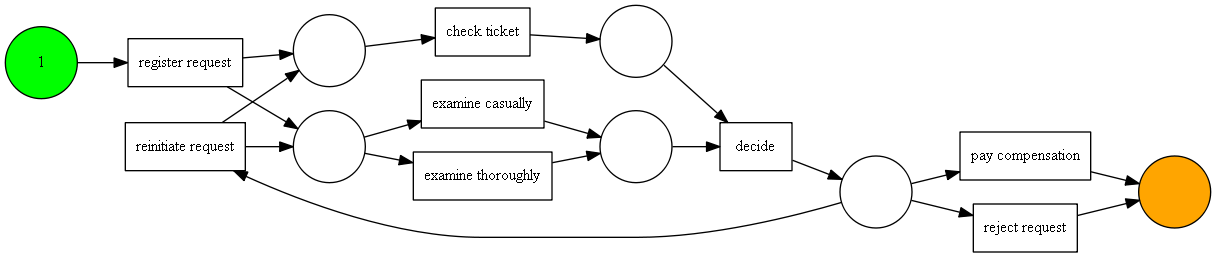

In [21]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  


replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

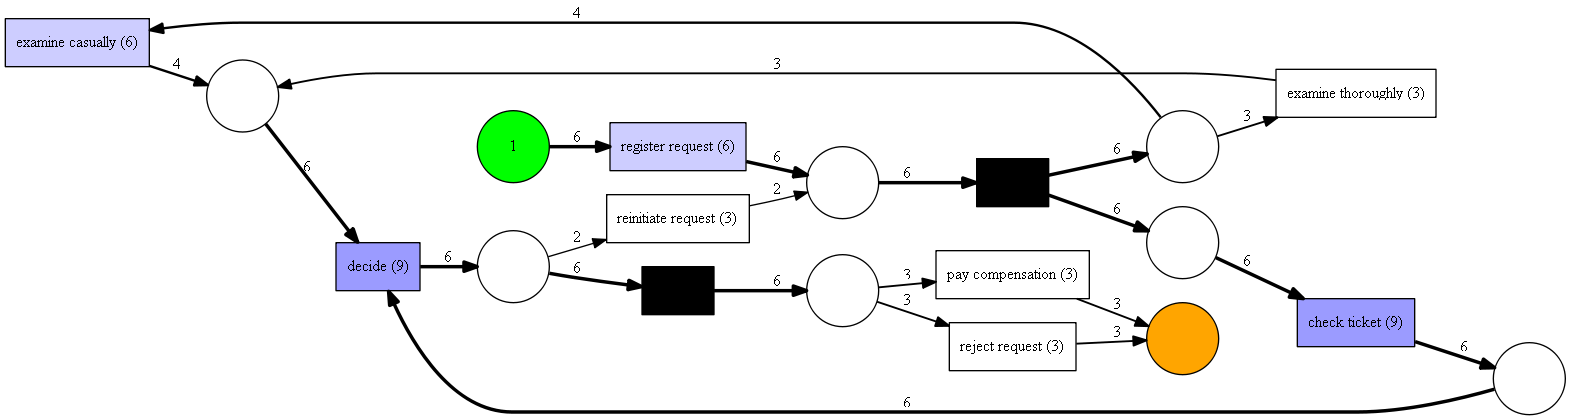

In [20]:

# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# save the Petri net pn_visualizer.save(gviz, "alpha_miner_petri_net.png")
pn_visualizer.view(gviz)

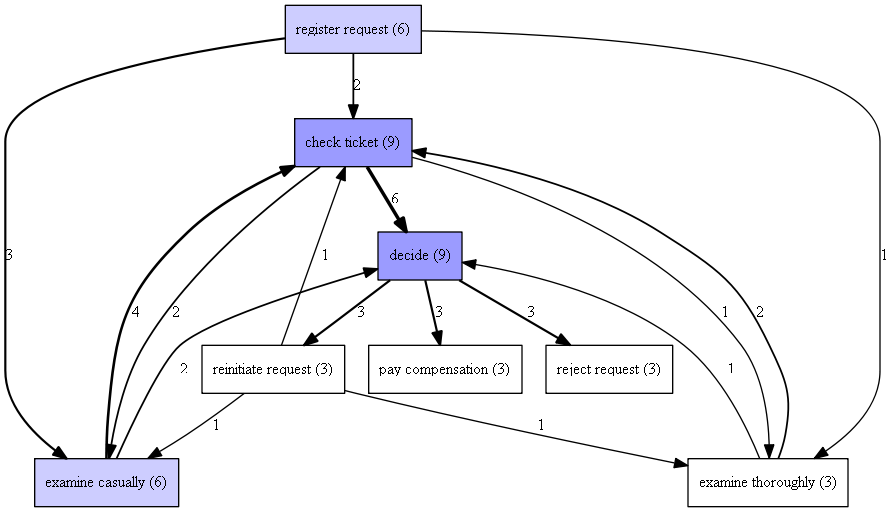

In [10]:
# creatig the graph from log
dfg = dfg_discovery.apply(log)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

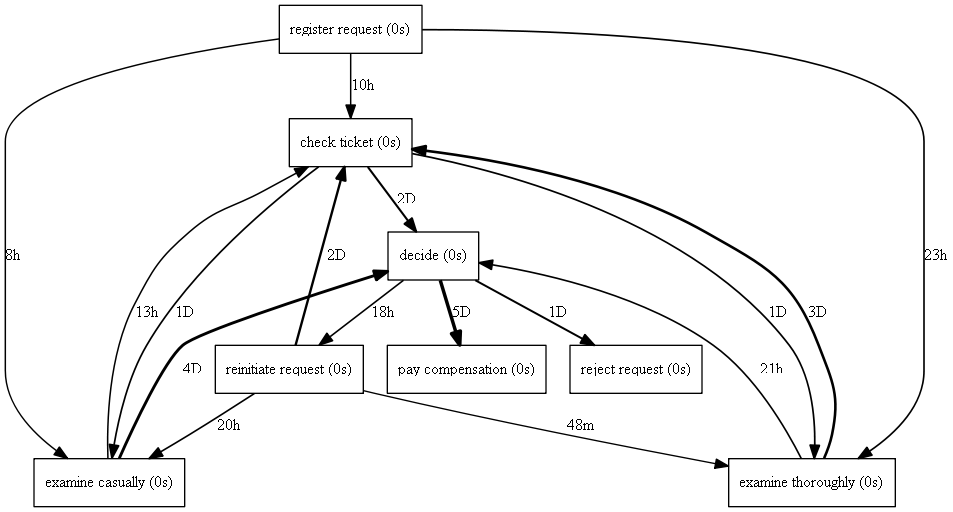

In [12]:

# creatig the graph from log
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

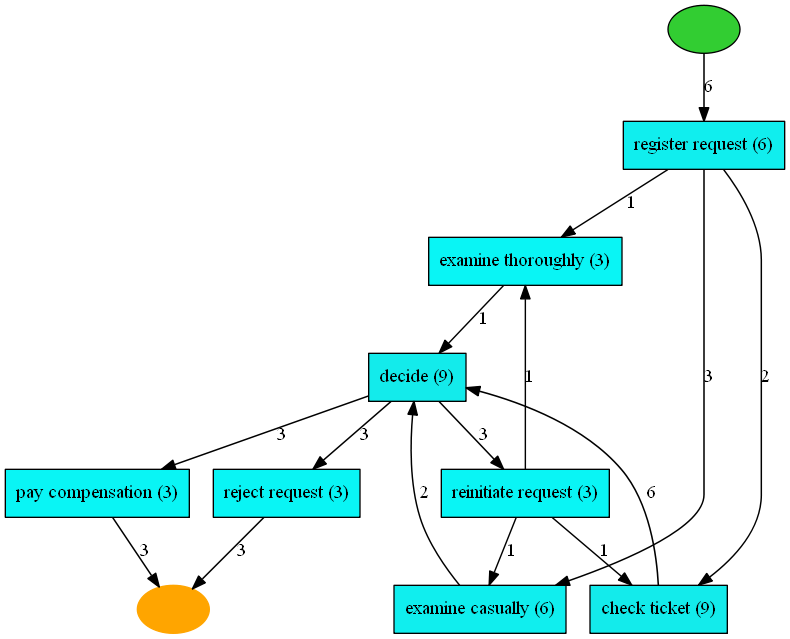

In [13]:
# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# viz
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  """


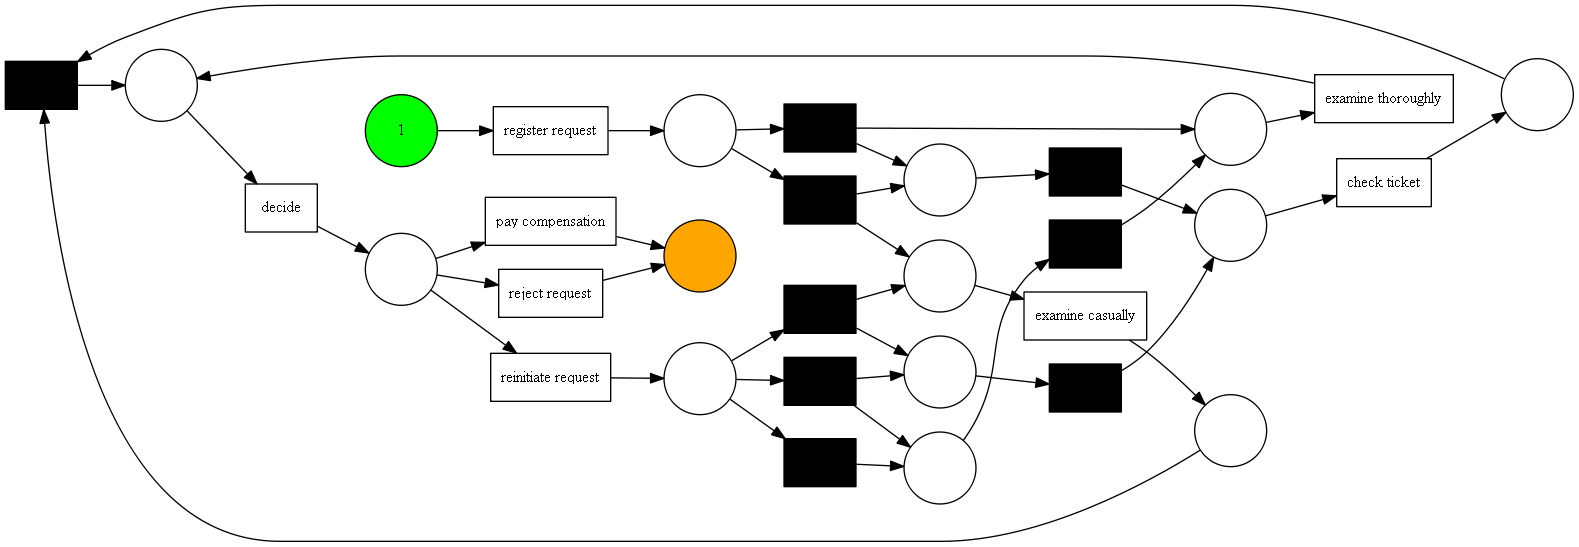

In [14]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

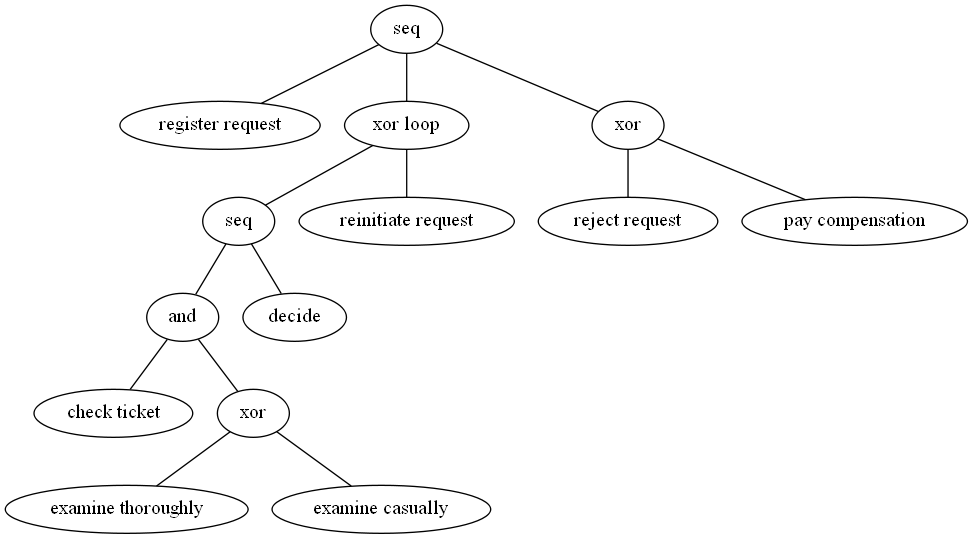

In [16]:
# create the process tree
tree = inductive_miner.apply_tree(log)

# viz
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  if sys.path[0] == '':


replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

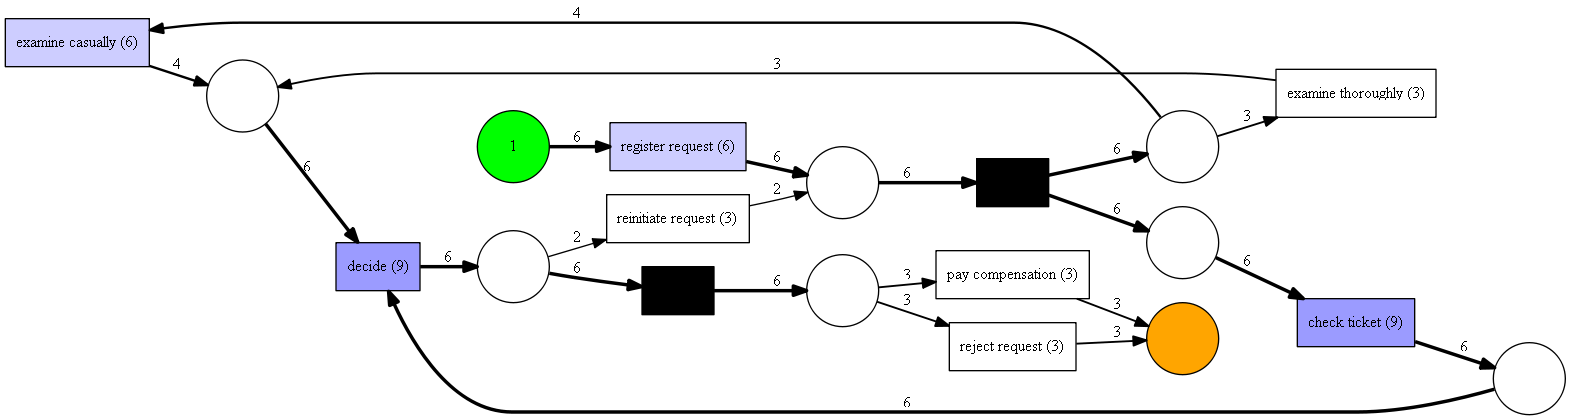

In [17]:

# convert the process tree to a petri net
net, initial_marking, final_marking = pt_converter.apply(tree)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
pn_visualizer.view(gviz)

In [ ]:
import numpy as np
#set eventlog import parameters
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from pm4py.objects.petri import networkx_graph

In [ ]:
#Loop -splits eventlog in two pieces according to slide-window
plotdata=[]
gedarray=[]

def return_eq(node1, node2):
    return node1==node2

for x in range(0, 1):
    testlog1=[log[x]]
    testlog2=[log[x]]

    #create nets from eventlogs with alphaminer
    net1, im1, fm1=alpha_miner.apply(testlog1)
    net2, im2, fm2=alpha_miner.apply(testlog2)

    #create petrinets from nets
    net1viz=pn_visualizer.apply(net1, im1, fm1)
    net2viz=pn_visualizer.apply(net2, im2, fm2)

    #create nx graph
    nx_graph1, inv_dict1=networkx_graph.create_networkx_directed_graph(net1)
    nx_graph2, inv_dict2=networkx_graph.create_networkx_directed_graph(net2)

    #replace original labels with labels from inv_dict
    nx.relabel_nodes(nx_graph1, inv_dict1, copy=False)
    nx.relabel_nodes(nx_graph2, inv_dict2, copy=False)

    #calculate nx GED
    print(nx.graph_edit_distance(nx_graph1, nx_graph2, node_match=return_eq))